In [5]:
# pandasのインポート
import pandas as pd
import sklearn
import numpy as np

# CSVファイルを読み込む
df = pd.read_csv('drugs.csv', encoding='shift-jis' )

# 先頭10行を表示する
df.head(10)

,ID,年齢,性別,血圧値,コレステロール値,Na/Pbレーション値,薬の種類
0,100001,23,F,HIGH,HIGH,25.355,DrugY
1,100002,47,M,LOW,HIGH,13.093,drugC
2,100003,47,M,LOW,HIGH,10.114,drugC
3,100004,28,F,NORMAL,HIGH,7.798,drugX
4,100005,61,F,LOW,HIGH,18.043,DrugY
5,100006,22,F,NORMAL,HIGH,8.607,drugX
6,100007,49,F,NORMAL,HIGH,16.275,DrugY
7,100008,41,M,LOW,HIGH,11.037,drugC
8,100009,60,M,NORMAL,HIGH,15.171,DrugY
9,100010,43,M,LOW,NORMAL,19.368,DrugY


In [6]:
# データの行数、列数を表示する
df.shape

(200, 7)

In [7]:
# データ内の欠損値の数を表示する
print('読み込んだデータ全体の欠損値数：', df.isnull().sum().sum())

# 薬の種類
print('薬の種類：', df['薬の種類'].unique())

読み込んだデータ全体の欠損値数： 0
薬の種類： ['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 薬の種類列のラベルエンコーディング
encoded = le.fit_transform(df['薬の種類'].values)
df['薬の種類'] = encoded
# できてるか確認
df.head(10)

,ID,年齢,性別,血圧値,コレステロール値,Na/Pbレーション値,薬の種類
0,100001,23,F,HIGH,HIGH,25.355,0
1,100002,47,M,LOW,HIGH,13.093,3
2,100003,47,M,LOW,HIGH,10.114,3
3,100004,28,F,NORMAL,HIGH,7.798,4
4,100005,61,F,LOW,HIGH,18.043,0
5,100006,22,F,NORMAL,HIGH,8.607,4
6,100007,49,F,NORMAL,HIGH,16.275,0
7,100008,41,M,LOW,HIGH,11.037,3
8,100009,60,M,NORMAL,HIGH,15.171,0
9,100010,43,M,LOW,NORMAL,19.368,0


In [10]:
# データのOneHotエンコーディングを行う
df = pd.get_dummies(df)
df.head(10)

,ID,年齢,Na/Pbレーション値,薬の種類,性別_F,性別_M,血圧値_HIGH,血圧値_LOW,血圧値_NORMAL,コレステロール値_HIGH,コレステロール値_NORMAL
0,100001,23,25.355,0,1,0,1,0,0,1,0
1,100002,47,13.093,3,0,1,0,1,0,1,0
2,100003,47,10.114,3,0,1,0,1,0,1,0
3,100004,28,7.798,4,1,0,0,0,1,1,0
4,100005,61,18.043,0,1,0,0,1,0,1,0
5,100006,22,8.607,4,1,0,0,0,1,1,0
6,100007,49,16.275,0,1,0,0,0,1,1,0
7,100008,41,11.037,3,0,1,0,1,0,1,0
8,100009,60,15.171,0,0,1,0,0,1,1,0
9,100010,43,19.368,0,0,1,0,1,0,0,1


In [11]:
corrdata = df.corr().abs()
corrdata

,ID,年齢,Na/Pbレーション値,薬の種類,性別_F,性別_M,血圧値_HIGH,血圧値_LOW,血圧値_NORMAL,コレステロール値_HIGH,コレステロール値_NORMAL
ID,1.000000,0.038820,0.029864,0.015707,0.024962,0.024962,0.099401,0.056253,0.048520,0.038036,0.038036
年齢,0.038820,1.000000,0.063119,0.041856,0.102027,0.102027,0.099782,0.112909,0.009025,0.068234,0.068234
Na/Pbレーション値,0.029864,0.063119,1.000000,0.689051,0.125008,0.125008,0.104985,0.043345,0.156355,0.010000,0.010000
薬の種類,0.015707,0.041856,0.689051,1.000000,0.018239,0.018239,0.407026,0.112195,0.319533,0.048415,0.048415
性別_F,0.024962,0.102027,0.125008,0.018239,1.000000,1.000000,0.021390,0.058356,0.036868,0.008811,0.008811
性別_M,0.024962,0.102027,0.125008,0.018239,1.000000,1.000000,0.021390,0.058356,0.036868,0.008811,0.008811
血圧値_HIGH,0.099401,0.099782,0.104985,0.407026,0.021390,0.021390,1.000000,0.542767,0.511811,0.095708,0.095708
血圧値_LOW,0.056253,0.112909,0.043345,0.112195,0.058356,0.058356,0.542767,1.000000,0.443749,0.042036,0.042036
血圧値_NORMAL,0.048520,0.009025,0.156355,0.319533,0.036868,0.036868,0.511811,0.443749,1.000000,0.145118,0.145118
コレステロール値_HIGH,0.038036,0.068234,0.010000,0.048415,0.008811,0.008811,0.095708,0.042036,0.145118,1.000000,1.000000


In [12]:
corr_y = pd.DataFrame({'列':corrdata.columns, '相関':corrdata['薬の種類']}, index=None)
corr_y = corr_y.reset_index(drop=True)
# 相関列の昇順、グラデーションを付けて表示
corr_y.sort_values(by='相関', ascending=False).style.background_gradient()

,列,相関
3,薬の種類,1.000000
2,Na/Pbレーション値,0.689051
6,血圧値_HIGH,0.407026
8,血圧値_NORMAL,0.319533
7,血圧値_LOW,0.112195
9,コレステロール値_HIGH,0.048415
10,コレステロール値_NORMAL,0.048415
1,年齢,0.041856
5,性別_M,0.018239
4,性別_F,0.018239


In [13]:
# 相関係数より、「Na/Pbレーション値	」、「血圧値_HIGH」、「血圧値_NORMAL」、「血圧値_LOW」を入力データにする
input_df = df[['Na/Pbレーション値','血圧値_HIGH','血圧値_NORMAL','血圧値_LOW']]

input_df.head()

,Na/Pbレーション値,血圧値_HIGH,血圧値_NORMAL,血圧値_LOW
0,25.355,1,0,0
1,13.093,0,0,1
2,10.114,0,0,1
3,7.798,0,1,0
4,18.043,0,0,1


In [14]:
# one-hotエンコーディング
correct_df = pd.get_dummies(df['薬の種類'])
correct_df.head(10)

,0,1,2,3,4
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,0,1
4,1,0,0,0,0
5,0,0,0,0,1
6,1,0,0,0,0
7,0,0,0,1,0
8,1,0,0,0,0
9,1,0,0,0,0


In [15]:
# numpyの行列データに変換
input_data = np.array(input_df)
correct_data = np.array(correct_df)

Epoch:0/1200 Error_train:1.5430200145513773 Error_test:1.5446521389734797
Epoch:100/1200 Error_train:0.2601628166392699 Error_test:0.2648282985062105
Epoch:200/1200 Error_train:0.24505445948366605 Error_test:0.2625046260574231
Epoch:300/1200 Error_train:0.24254503015541196 Error_test:0.250568853561828
Epoch:400/1200 Error_train:0.23998513993515144 Error_test:0.27565028776658584
Epoch:500/1200 Error_train:0.2373537311460667 Error_test:0.2722591477211934
Epoch:600/1200 Error_train:0.23589198549317372 Error_test:0.2705266791478018
Epoch:700/1200 Error_train:0.23339310005594985 Error_test:0.297436668439566
Epoch:800/1200 Error_train:0.23795131669300673 Error_test:0.32042482226667857
Epoch:900/1200 Error_train:0.23189709902762753 Error_test:0.27925063825862445
Epoch:1000/1200 Error_train:0.23273752846811865 Error_test:0.27470477797830606
Epoch:1100/1200 Error_train:0.22177781238269534 Error_test:0.31555645137892074


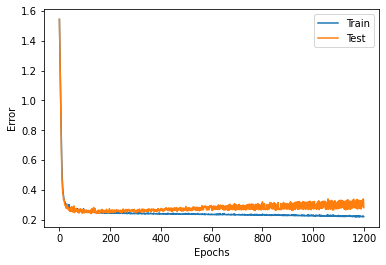

Accuracy Train: 88.7218045112782% Accuracy Test: 85.07462686567165%


In [16]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_data = len(correct_data)  

# -- 入力データを標準化する --
ave_input = np.average(input_data, axis=0)
std_input = np.std(input_data, axis=0)
input_data = (input_data - ave_input) / std_input


# 訓練データとテストデータ --　
index = np.arange(n_data)
index_train = index[index%3 != 0]
index_test = index[index%3 == 0]

input_train = input_data[index_train, :]  # 訓練 入力
correct_train = correct_data[index_train, :]  # 訓練 正解
input_test = input_data[index_test, :]  # テスト 入力
correct_test = correct_data[index_test, :]  # テスト 正解

n_train = input_train.shape[0]  # 訓練データのサンプル数
n_test = input_test.shape[0]  # テストデータのサンプル数

# 各設定値
n_in = 4  # 入力層のニューロン数
n_mid = 30  # 中間層のニューロン数
n_out = 5  # 出力層のニューロン数

# ハイパーパラメータの設定
wb_width = 0.1  # 重みとバイアスの広がり具合
eta = 0.01  # 学習係数
epoch = 1200
batch_size = 8
interval = 100  # 経過の表示間隔

# -- 各層の継承元 --
class BaseLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)  # 重み（行列）
        self.b = wb_width * np.random.randn(n)  # バイアス（ベクトル）

    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

# -- 中間層 --
class MiddleLayer(BaseLayer):
    def forward(self, x):
        self.x = x
        self.u = np.dot(x, self.w) + self.b
        self.y = np.where(self.u <= 0, 0, self.u) # ReLU
    
    def backward(self, grad_y):
        delta = grad_y * np.where(self.u <= 0, 0, 1)  # ReLUの微分

        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T) 

# -- 出力層 --
class OutputLayer(BaseLayer):     
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = np.exp(u)/np.sum(np.exp(u), axis=1, keepdims=True)  # ソフトマックス関数

    def backward(self, t):
        delta = self.y - t
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T) 
        
# -- 各層の初期化 --
# インスタンス化してる
middle_layer_1 = MiddleLayer(n_in, n_mid)
middle_layer_2 = MiddleLayer(n_mid, n_mid)
output_layer = OutputLayer(n_mid, n_out)

# -- 順伝播 --
def forward_propagation(x):
    middle_layer_1.forward(x)
    middle_layer_2.forward(middle_layer_1.y)
    output_layer.forward(middle_layer_2.y)

# -- 逆伝播 --
def backpropagation(t):
    output_layer.backward(t)
    middle_layer_2.backward(output_layer.grad_x)
    middle_layer_1.backward(middle_layer_2.grad_x)

# -- 重みとバイアスの更新 --
def uppdate_wb():
    middle_layer_1.update(eta)
    middle_layer_2.update(eta)
    output_layer.update(eta)

# -- 誤差を計算 --
def get_error(t, batch_size):
    return -np.sum(t * np.log(output_layer.y + 1e-7)) / batch_size  # 交差エントロピー誤差


# -- 誤差の記録用 --
train_error_x = []
train_error_y = []
test_error_x = []
test_error_y = []

# -- 学習と経過の記録 --
n_batch = n_train // batch_size  # 1エポックあたりのバッチ数
for i in range(epoch):

    # -- 誤差の計測 --  
    forward_propagation(input_train)
    error_train = get_error(correct_train, n_train)
    forward_propagation(input_test)
    error_test = get_error(correct_test, n_test)
    
    # -- 誤差の記録 -- 
    test_error_x.append(i)
    test_error_y.append(error_test) 
    train_error_x.append(i)
    train_error_y.append(error_train) 
    
    # -- 経過の表示 -- 
    if i%interval == 0:
        print("Epoch:" + str(i) + "/" + str(epoch),
              "Error_train:" + str(error_train),
              "Error_test:" + str(error_test))

    # -- 学習 -- 
    index_random = np.arange(n_train)
    np.random.shuffle(index_random)  # インデックスをシャッフルする
    for j in range(n_batch):
        
        # ミニバッチを取り出す
        mb_index = index_random[j*batch_size : (j+1)*batch_size]
        x = input_train[mb_index, :]
        t = correct_train[mb_index, :]
        
        # 順伝播と逆伝播
        forward_propagation(x)
        backpropagation(t)
        
        # 重みとバイアスの更新
        uppdate_wb()

        
# -- 誤差の記録をグラフ表示 -- 
plt.plot(train_error_x, train_error_y, label="Train")
plt.plot(test_error_x, test_error_y, label="Test")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")

plt.show()

# -- 正解率の測定 -- 
forward_propagation(input_train)
count_train = np.sum(np.argmax(output_layer.y, axis=1) == np.argmax(correct_train, axis=1))

forward_propagation(input_test)
count_test = np.sum(np.argmax(output_layer.y, axis=1) == np.argmax(correct_test, axis=1))

print("Accuracy Train:", str(count_train/n_train*100) + "%",
      "Accuracy Test:", str(count_test/n_test*100) + "%")